# Job analysis

### Imports and initialization of objects

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

sys.path.append(project_root)

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import matplotlib as mpl
import seaborn as sns
import pandas as pd

from app.database import Database
from app.logger import Logger

In [3]:
sns.set_theme(style="whitegrid")

logger = Logger()

db = Database(logger)

db.fill_temp_table_with_filters()

2025-02-05 11:26:48 [INFO]: The database from file C:\Users\pczub\PycharmProjects\analyzing_job_offers\data\database_structure.sql already exists!


In [4]:
# 1. Data type variables
date_from_widget = widgets.Text(
    value='',
    placeholder='YYYY-MM-DD',
    description='Data od:',
    disabled=False
)
date_to_widget = widgets.Text(
    value='',
    placeholder='YYYY-MM-DD',
    description='Data do:',
    disabled=False
)

# 2. Multiple category selection
all_categories = db.get_unique_categories()
categories_widget = widgets.SelectMultiple(
    options=all_categories,
    description='Category:',
    disabled=False
)

# 3. Multiple location selection
all_locations = db.get_unique_locations()
locations_widget = widgets.SelectMultiple(
    options=all_locations,
    description='Location:',
    disabled=False
)

# 4. Multiple position selection
all_positions = db.get_unique_positions()
positions_widget = widgets.SelectMultiple(
    options=all_positions,
    description='Position:',
    disabled=False
)

# 5. Multiple exprience selection
all_experiences = db.get_unique_experiences()
experience_widget = widgets.SelectMultiple(
    options=all_experiences,
    description='Experience:',
    disabled=False
)

# 6. Multiple mode selection
all_modes = db.get_unique_operating_modes()
operating_mode_widget = widgets.SelectMultiple(
    options=all_modes,
    description='Mode:',
    disabled=False
)

In [5]:
# Buttons and action to download data
button = widgets.Button(description="Pobierz dane")

def on_button_clicked(b):
    # Odpalamy filtr z wartości widgetów
    # Run filter with values from widgets
    date_from_val = date_from_widget.value
    date_to_val = date_to_widget.value
    categories_val = list(categories_widget.value) if categories_widget.value else None
    locations_val = list(locations_widget.value) if locations_widget.value else None
    positions_val = list(positions_widget.value) if positions_widget.value else None
    experience_val = list(experience_widget.value) if experience_widget.value else None
    operating_mode_val = list(operating_mode_widget.value) if operating_mode_widget.value else None
    
    db.fill_temp_table_with_filters(
        date_from=date_from_val,
        date_to=date_to_val,
        categories=categories_val,
        locations=locations_val,
        positions=positions_val,
        experiences=experience_val,
        operating_modes=operating_mode_val
    )
    
    display(df_filtered.head(20))  # display a sample of 20 lines

button.on_click(on_button_clicked)

# display all widgets
display(date_from_widget)
display(date_to_widget)
display(categories_widget)
display(locations_widget)
display(positions_widget)
display(experience_widget)
display(operating_mode_widget)
button

Text(value='', description='Data od:', placeholder='YYYY-MM-DD')

Text(value='', description='Data do:', placeholder='YYYY-MM-DD')

SelectMultiple(description='Category:', options=('admin', 'analytics', 'architecture', 'c', 'data', 'devops', …

SelectMultiple(description='Location:', options=("'s-hertogenbosch", '8 sandridge park', '96-321 musuły', 'abu…

SelectMultiple(description='Position:', options=(), value=())

SelectMultiple(description='Experience:', options=('junior', 'mid', 'senior'), value=())

SelectMultiple(description='Mode:', options=('office', 'partly_remote', 'remote'), value=())

Button(description='Pobierz dane', style=ButtonStyle())

### 1. Job listings by most popular location

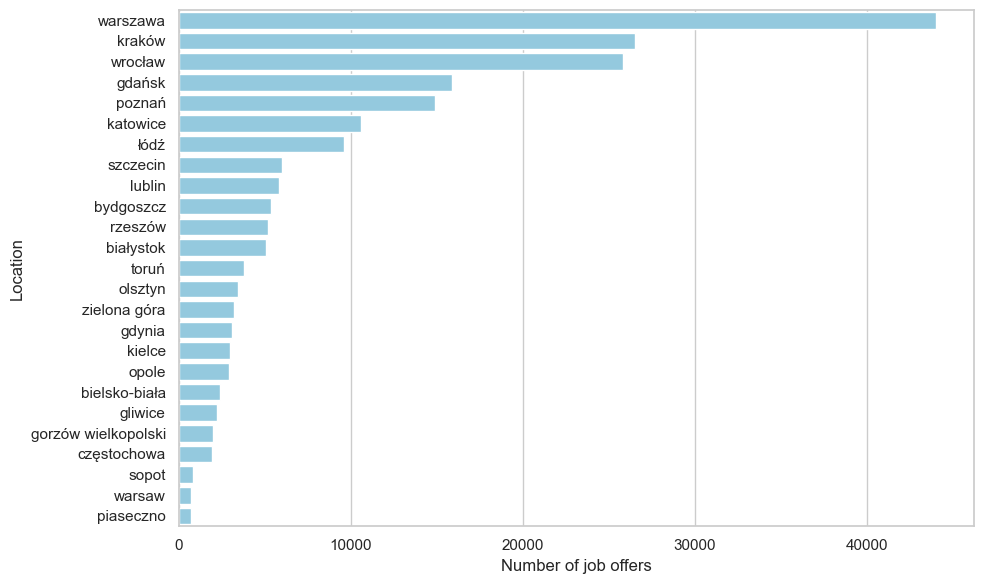

In [6]:
number_of_locations = 25

df_location = db.get_offers_by_location().head(n=number_of_locations)

plt.figure(figsize=(10,6))
sns.barplot(x="total_offers", y="location", data=df_location, color="skyblue")
plt.xlabel("Number of job offers")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

### 2. Job opportunities by experience

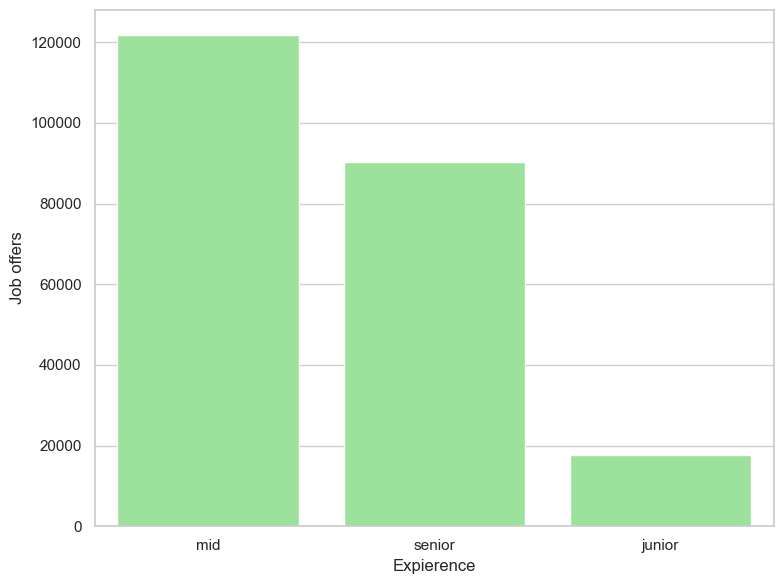

In [7]:
df_experience = db.get_offers_by_experience()
#display(df_experience)

plt.figure(figsize=(8,6))
sns.barplot(x="experience", y="total_offers", data=df_experience, color="lightgreen")
plt.xlabel("Expierence")
plt.ylabel("Job offers")
plt.tight_layout()
plt.show()

### 3. Average salary ranges (B2B and Permanent) by experience and currency.

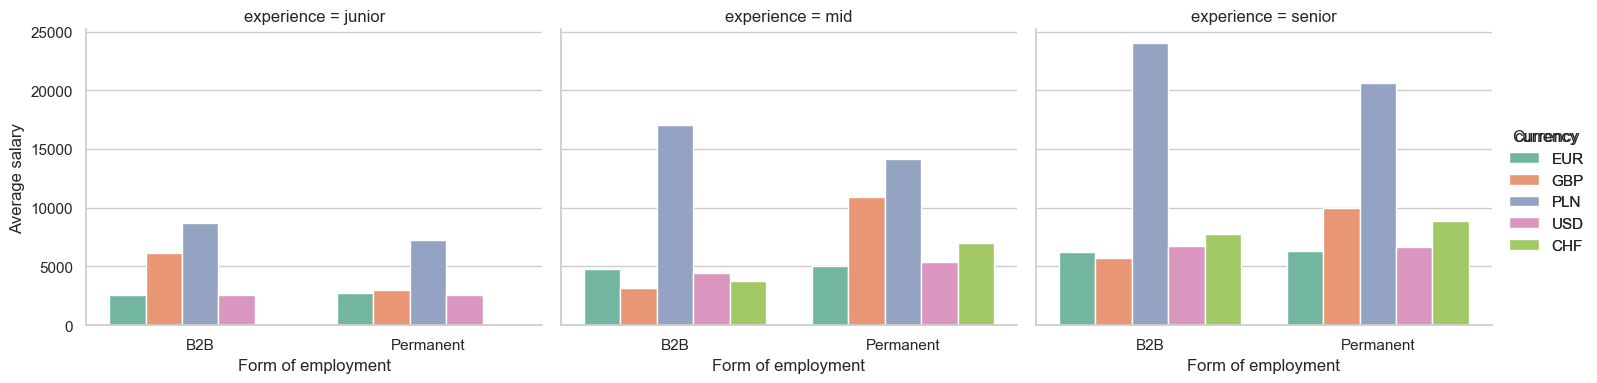

In [8]:
# Data preparation - assume that df_salaries is the DataFrame with data
# and df_melted is the DataFrame after the transformation from the previous examples.
# If df_melted is already created, you can skip the preparation code below.

# Example code that creates df_melted as needed (adapt to your situation):
df_salaries = db.get_avg_salary_by_experience_and_currency()

df_melted = df_salaries.melt(
    id_vars=["experience", "currency"], 
    value_vars=["avg_b2b_salary", "avg_permanent_salary"], 
    var_name="type", 
    value_name="salary"
)

# Replace type names with more readable ones
df_melted['type'] = df_melted['type'].replace({
    'avg_b2b_salary': 'B2B', 
    'avg_permanent_salary': 'Permanent'
})

sns.set_theme(style="whitegrid")

g = sns.catplot(
    x='type', 
    y='salary', 
    hue='currency', 
    col='experience',
    data=df_melted, 
    kind='bar', 
    palette='Set2', 
    height=4, 
    aspect=1.2
)

g.set_axis_labels("Form of employment", "Average salary")
g.add_legend(title="Currency")

plt.show()

### 4. Distribution of the number of bids over time (year-month)

2025-02-05 11:26:51 [INFO]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-05 11:26:51 [INFO]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


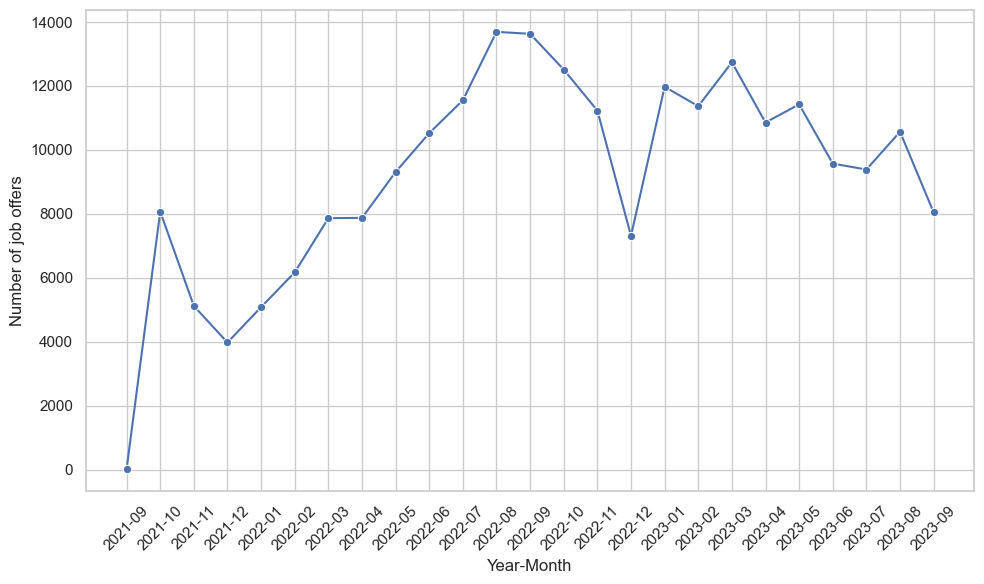

In [9]:
df_year_month = db.get_offers_by_year_month()
#display(df_year_month.head())

plt.figure(figsize=(10,6))
sns.lineplot(x="year_month", y="total_offers", data=df_year_month, marker="o")
plt.xlabel("Year-Month")
plt.ylabel("Number of job offers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Job offers according to operating mode

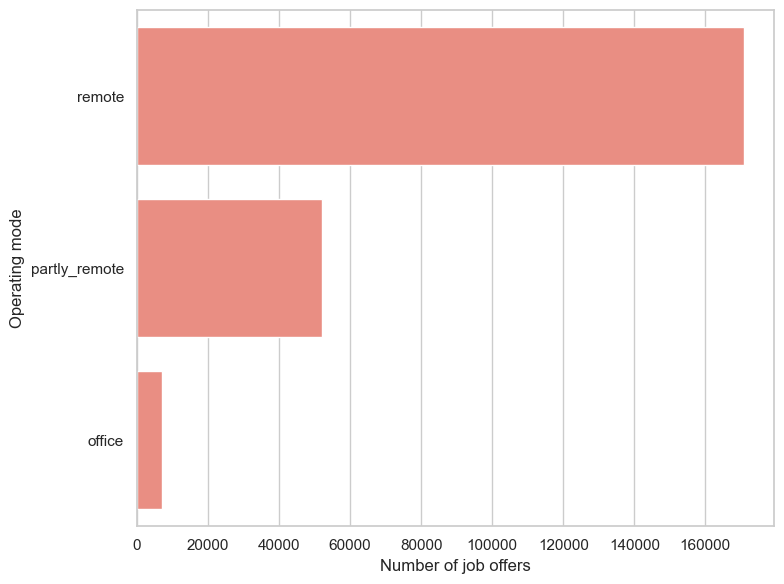

In [10]:
df_mode = db.get_offers_by_operating_mode()
#display(df_mode.head())

plt.figure(figsize=(8,6))
sns.barplot(x="total_offers", y="operating_mode", data=df_mode, color="salmon")
plt.xlabel("Number of job offers")
plt.ylabel("Operating mode")
plt.tight_layout()
plt.show()

### 6. Most popular technologies

2025-02-05 11:26:54 [INFO]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\pczub\AppData\Local\Temp\ipykernel_21128\3247480071.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
2025-02-05 11:26:54 [INFO]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


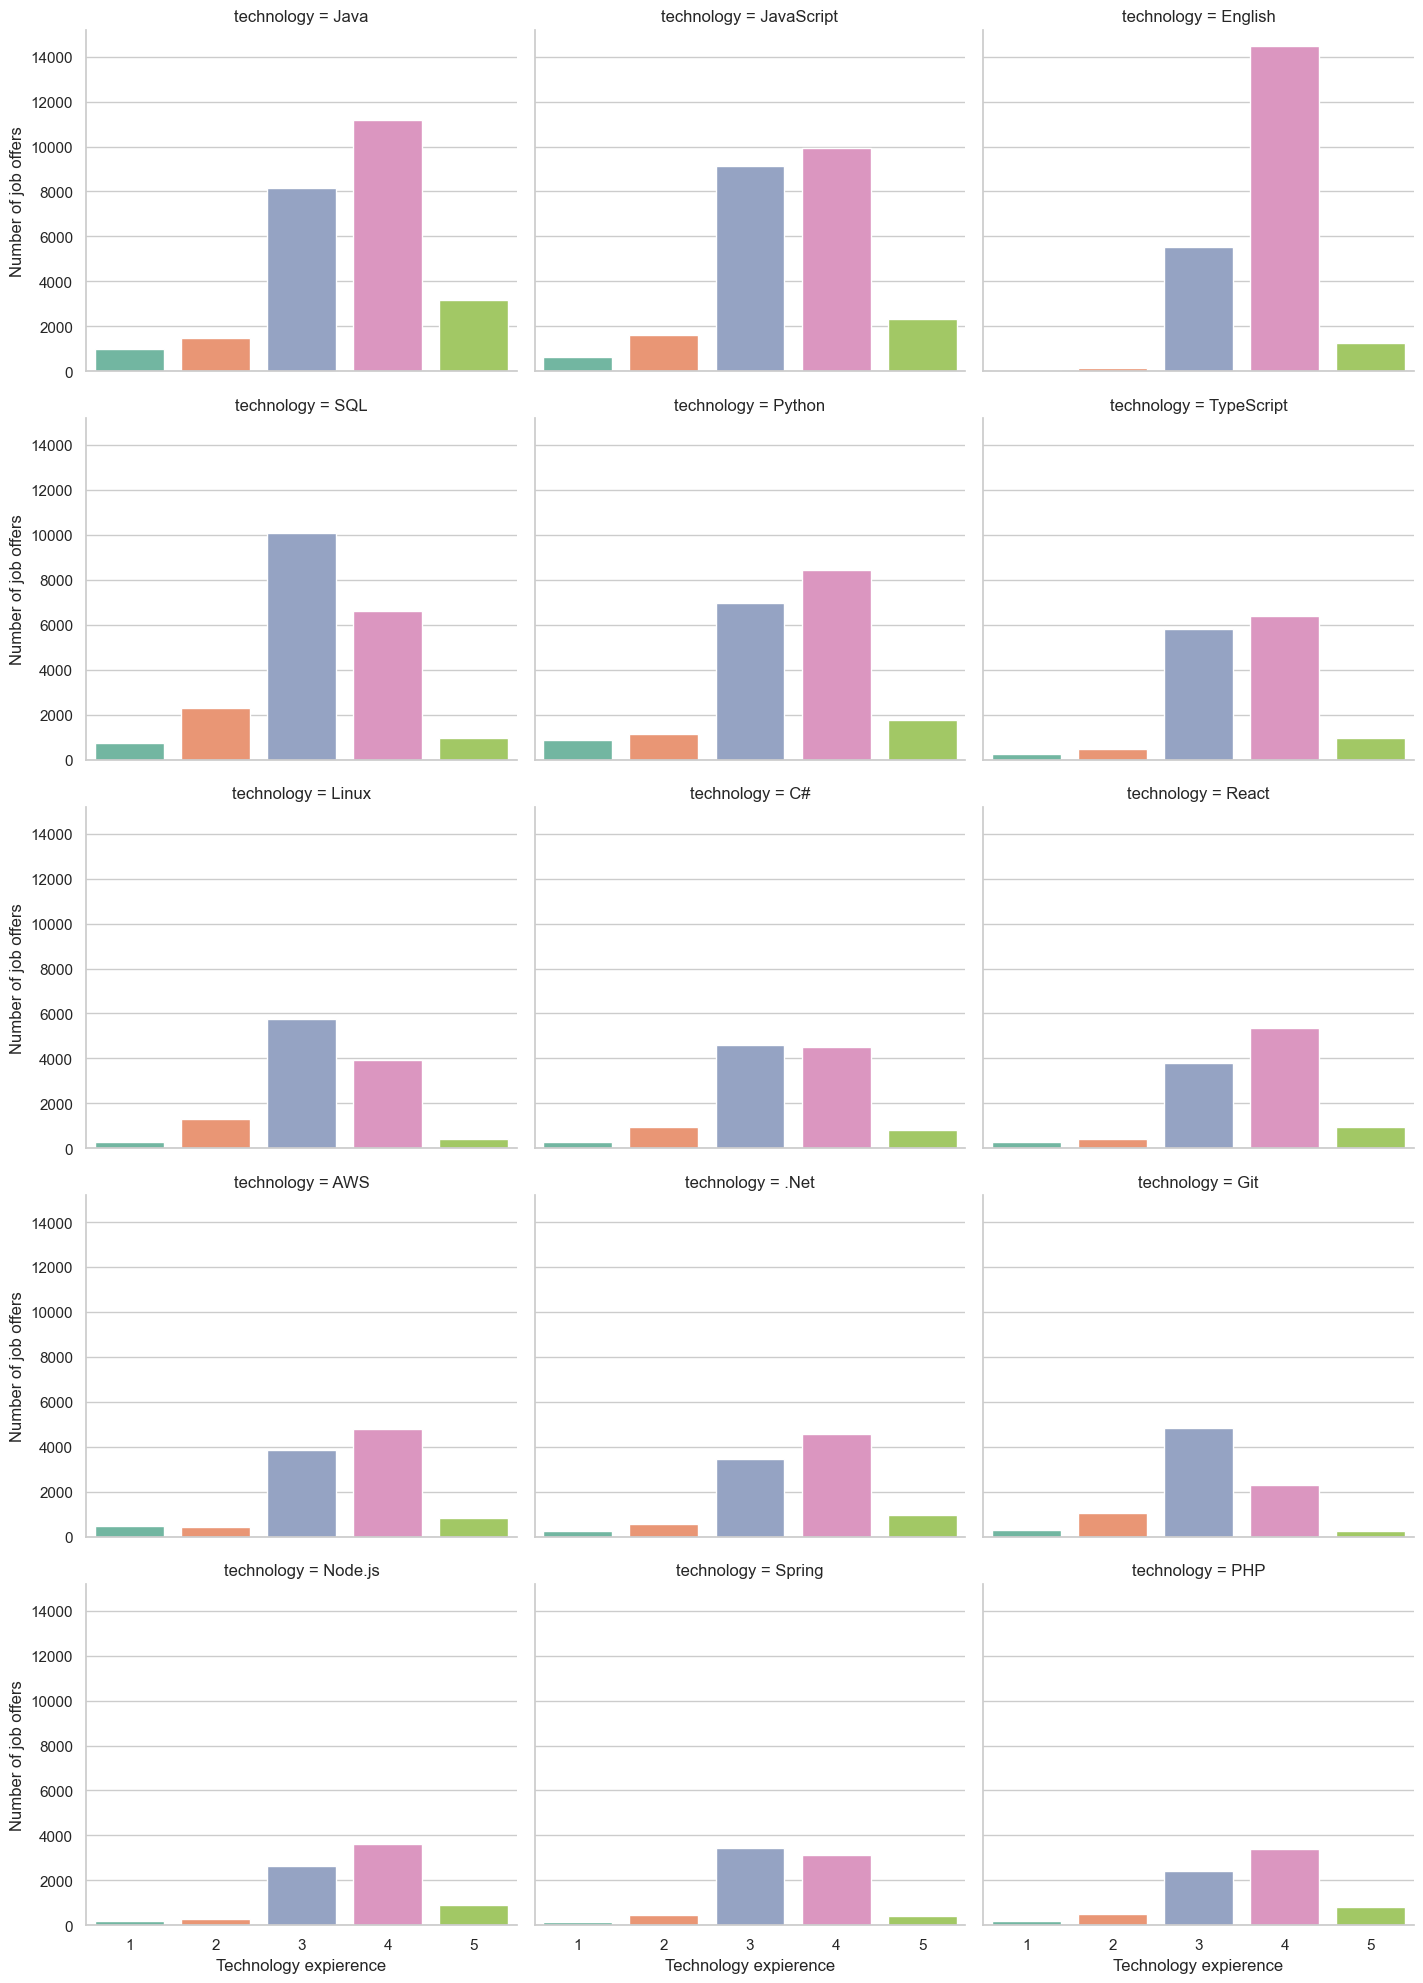

In [11]:
df_tech_sorted = db.get_technology_with_levels_sorted()

# We preview the data
# display(df_tech_sorted.head(20))

sns.set_theme(style="whitegrid")

# Let's assume that we have a total of a dozen technologies, 
# Otherwise the chart will become unreadable. We can limit to top 5-15 technologies.
# First we will sort and retrieve the top 15 technologies (by total_for_tech).
top_techs = df_tech_sorted.drop_duplicates(subset=["technology"])\
                          .head(15)["technology"]

df_top = df_tech_sorted[df_tech_sorted["technology"].isin(top_techs)]

# Chart: catplot with columns = technology, X axis = skill_level, Y axis = total_offers
g = sns.catplot(
    x="skill_level",
    y="total_offers",
    col="technology",
    data=df_top,
    kind="bar",
    col_wrap=3,
    height=4, aspect=1.2,
    palette="Set2"
)
g.set_axis_labels("Technology expierence", "Number of job offers")
plt.show()